In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/movie-recommender-systems/__results__.html
/kaggle/input/movie-recommender-systems/__output__.json
/kaggle/input/movie-recommender-systems/custom.css
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


## LOADING THE DATA

In [2]:
credit_df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [3]:
credit_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credit_df.columns = ['id', 'title', 'cast', 'crew']
merged_df = movies_df.merge(credit_df, on = 'id')

In [6]:
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## DEMOGRAPHIC FILTERING BASED ON WEIGHTED RATINGS

In [7]:
C = merged_df['vote_average'].mean()
m = merged_df['vote_count'].quantile(0.9)

In [8]:
q_movies = merged_df.copy().loc[merged_df['vote_count'] >= m]

In [9]:
q_movies.shape

(481, 23)

In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m)*R) + (m/(m+v)*C)

In [11]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [12]:
q_movies = q_movies.sort_values('score', ascending = False)

q_movies[['title_y', 'vote_count', 'vote_average', 'score']].head(10)

,title_y,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [13]:
pop = merged_df.sort_values('popularity', ascending = False)

In [14]:
from matplotlib.pyplot import subplots

Text(0, 0.5, 'Popular Movies')

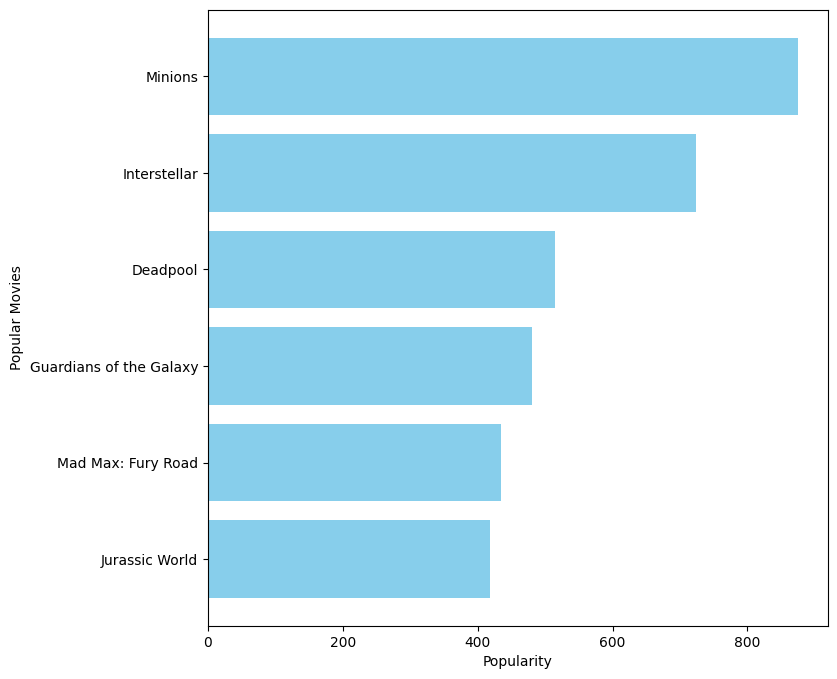

In [15]:
fig, ax = subplots(figsize=(8,8))

ax.barh(pop['title_y'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
ax.invert_yaxis()
ax.set_xlabel('Popularity')
ax.set_ylabel('Popular Movies')

## CONTENT BASED FILTERING

In [16]:
merged_df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

merged_df['overview'] = merged_df['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(merged_df['overview'])

In [19]:
tfidf_matrix.shape

(4803, 20978)

In [20]:
from sklearn.metrics.pairwise import linear_kernel

In [21]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
indices = pd.Series(merged_df.index, index = merged_df['title_y']).drop_duplicates()

In [23]:
indices

title_y
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [24]:
def get_recommendations(title, cosine_sim = cosine_sim):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return merged_df['title_y'].iloc[movie_indices]

In [25]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_y, dtype: object

In [26]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    merged_df[feature] = merged_df[feature].apply(literal_eval)

In [27]:
merged_df['crew'].iloc[1]

[{'credit_id': '52fe4232c3a36847f800b579',
  'department': 'Camera',
  'gender': 2,
  'id': 120,
  'job': 'Director of Photography',
  'name': 'Dariusz Wolski'},
 {'credit_id': '52fe4232c3a36847f800b4fd',
  'department': 'Directing',
  'gender': 2,
  'id': 1704,
  'job': 'Director',
  'name': 'Gore Verbinski'},
 {'credit_id': '52fe4232c3a36847f800b54f',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer'},
 {'credit_id': '52fe4232c3a36847f800b503',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Screenplay',
  'name': 'Ted Elliott'},
 {'credit_id': '52fe4232c3a36847f800b509',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Screenplay',
  'name': 'Terry Rossio'},
 {'credit_id': '52fe4232c3a36847f800b57f',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '52fe4232c3a36847f800b585',
  'department': 'Editing',
  'gender': 2,
 

In [28]:
def get_director(x):

    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [29]:
def get_list(x):

    if isinstance(x, list):
        names = [i['name'] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [30]:
merged_df['director'] = merged_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']

for feature in features:
    merged_df[feature] = merged_df[feature].apply(get_list)

In [31]:
merged_df[['title_y', 'cast', 'director', 'keywords', 'genres']]

,title_y,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...,...,...
4798,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4799,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",Edward Burns,[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",Scott Smith,"[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4801,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]",Daniel Hsia,[],[]


In [32]:
merged_df[['title_y', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_y,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [33]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", '')) for i in x]

    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ''))
        else:
            return ''

In [34]:
features = ['cast', 'keywords', 'genres', 'director']

for feature in features:
    merged_df[feature] = merged_df[feature].apply(clean_data)

In [35]:
merged_df[features]

,cast,keywords,genres,director
0,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]","[action, adventure, fantasy]",jamescameron
1,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]",goreverbinski
2,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]","[action, adventure, crime]",sammendes
3,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]","[action, crime, drama]",christophernolan
4,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]",andrewstanton
...,...,...,...,...
4798,"[carlosgallardo, jaimedehoyos, petermarquardt]","[unitedstates–mexicobarrier, legs, arms]","[action, crime, thriller]",robertrodriguez
4799,"[edwardburns, kerrybishé, marshadietlein]",[],"[comedy, romance]",edwardburns
4800,"[ericmabius, kristinbooth, crystallowe]","[date, loveatfirstsight, narration]","[comedy, drama, romance]",scottsmith
4801,"[danielhenney, elizacoupe, billpaxton]",[],[],danielhsia


In [36]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

merged_df['soup'] = merged_df.apply(create_soup, axis=1)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(merged_df['soup'])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [39]:
merged_df = merged_df.reset_index()
indices = pd.Series(merged_df.index, index = merged_df['title_y'])

In [40]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_y, dtype: object

In [41]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_y, dtype: object

## COLLABORATIVE FILTERING

In [42]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [43]:
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [44]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [45]:
svd = SVD()

results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9043  0.8963  0.9028  0.8930  0.8904  0.8974  0.0054  
MAE (testset)     0.6979  0.6898  0.6944  0.6894  0.6847  0.6912  0.0045  
Fit time          1.47    1.49    1.51    1.48    1.51    1.49    0.02    
Test time         0.26    0.12    0.25    0.12    0.13    0.18    0.06    


In [46]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [47]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [48]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6685265071859767, details={'was_impossible': False})